In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [3]:
DATA_PATH = "forestCover.csv"   # change if needed
df = pd.read_csv(DATA_PATH, na_values=["?"])
print(df.shape)
df.head()

(581012, 59)


,Elevation,Aspect,Facet,Slope,Inclination,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Observation_ID,Water_Level,Cover_Type
0,3208920,166,415.394727,6.0,0.691628,408,62,3137,225,242,151,2366,1,0,0,0,positive,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2
1,2789020,137,343.302186,9.0,0.621245,30,2,1040,235,237,133,1804,0,0,1,0,positive,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,3
2,3384615,357,894.231390,9.0,-0.266086,362,15,3113,207,225,156,295,1,0,0,0,positive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1
3,3348150,148,371.346939,6.0,0.786375,247,50,1207,228,240,145,2405,1,0,0,0,positive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,2
4,3061955,124,310.783430,11.0,-0.335685,170,19,1595,238,232,124,2837,1,0,0,0,positive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,1,2


In [4]:
dtypes = df.dtypes.to_frame("dtype")
missing = df.isna().sum().sort_values(ascending=False).to_frame("n_missing")
card = df.nunique(dropna=True).sort_values().to_frame("n_unique")

print("=== DTYPES ===")
display(dtypes.head(30))
print("=== TOP MISSING ===")
display(missing.head(20))
print("=== LOWEST CARDINALITY (potential constants) ===")
display(card.head(10))
print("=== HIGHEST CARDINALITY (potential IDs) ===")
display(card.tail(10))cand = []
for c in df.columns:


=== DTYPES ===


,dtype
Elevation,int64
Aspect,int64
Facet,float64
Slope,float64
Inclination,float64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64


=== TOP MISSING ===


,n_missing
Slope,298
Aspect,0
Elevation,0
Facet,0
Inclination,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0


=== LOWEST CARDINALITY (potential constants) ===


,n_unique
Water_Level,1
Wilderness_Area1,2
Wilderness_Area3,2
Wilderness_Area2,2
Soil_Type12,2
Soil_Type11,2
Soil_Type10,2
Wilderness_Area4,2
Soil_Type8,2
Soil_Type7,2


=== HIGHEST CARDINALITY (potential IDs) ===


,n_unique
Hillshade_3pm,255
Aspect,361
Horizontal_Distance_To_Hydrology,576
Vertical_Distance_To_Hydrology,700
Elevation,1978
Horizontal_Distance_To_Roadways,5785
Horizontal_Distance_To_Fire_Points,5827
Facet,576099
Inclination,580946
Observation_ID,581012


In [5]:
# Heuristic suggestions for a classification target:
cand = []
for c in df.columns:
    nunq = df[c].nunique(dropna=True)
    is_num = pd.api.types.is_numeric_dtype(df[c])
    # consider categorical-ish or limited classes
    if (not is_num and nunq > 1) or (is_num and 2 <= nunq <= 30):
        cand.append((c, nunq, "num" if is_num else "cat"))
cand = pd.DataFrame(cand, columns=["column","n_unique","type"]).sort_values(["n_unique","column"])
cand.head(20)

,column,n_unique,type
4,Soil_Type1,2,cat
13,Soil_Type10,2,num
14,Soil_Type11,2,num
15,Soil_Type12,2,num
16,Soil_Type13,2,num
17,Soil_Type14,2,num
18,Soil_Type15,2,num
19,Soil_Type16,2,num
20,Soil_Type17,2,num
21,Soil_Type18,2,num


In [6]:
TARGET = "Cover_Type"  
assert TARGET in df.columns

In [7]:
y = df[TARGET]
print("=== Target distribution ===")
display(y.value_counts(dropna=False).to_frame("count").assign(frac=lambda t: t["count"]/len(y)))

X = df.drop(columns=[TARGET])

num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

len(num_cols), len(cat_cols), num_cols[:10], cat_cols[:10]

=== Target distribution ===


,count,frac
Cover_Type,,
2,283301,0.487599
1,211840,0.364605
3,35754,0.061537
7,20510,0.035300
6,17367,0.029891
5,9493,0.016339
4,2747,0.004728


(57,
 1,
 ['Elevation',
  'Aspect',
  'Facet',
  'Slope',
  'Inclination',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon'],
 ['Soil_Type1'])

In [8]:
# constants and unique-id candidates
const_cols = card[card["n_unique"] <= 1].index.tolist()
unique_id_cols = [c for c in df.columns if df[c].nunique(dropna=True) == len(df)]
print("Const cols:", const_cols)
print("Unique-ID-like cols:", unique_id_cols)

# numeric scale disparities (KNN cares)
desc = df[num_cols].describe(percentiles=[.01, .25, .5, .75, .99]).T
desc[["min","1%","25%","50%","75%","99%","max"]] = desc[["min","1%","25%","50%","75%","99%","max"]].round(3)
desc.head(15)

# top correlated numeric pairs (Trees less sensitive; KNN distance can be distorted)
corr = df[num_cols].corr(numeric_only=True)
top_pairs = (
    corr.abs()
        .where(~np.eye(corr.shape[0], dtype=bool))
        .stack()
        .sort_values(ascending=False)
        .reset_index()
)
top_pairs.columns = ["feature_1","feature_2","|corr|"]
top_pairs.head(15)

Const cols: ['Water_Level']
Unique-ID-like cols: ['Observation_ID']


,feature_1,feature_2,|corr|
0,Aspect,Facet,0.999998
1,Facet,Aspect,0.999998
2,Wilderness_Area1,Wilderness_Area3,0.793593
3,Wilderness_Area3,Wilderness_Area1,0.793593
4,Hillshade_3pm,Hillshade_9am,0.780296
5,Hillshade_9am,Hillshade_3pm,0.780296
6,Hillshade_3pm,Aspect,0.646944
7,Aspect,Hillshade_3pm,0.646944
8,Hillshade_3pm,Facet,0.646941
9,Facet,Hillshade_3pm,0.646941


In [19]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score, accuracy_score, classification_report

SEED = 13
VAL_SIZE = 0.15
DATA_PATH = "forestCover.csv"
TARGET = "Cover_Type"

# Running experiment log (we’ll keep appending to this)
EXP_LOG = {"drops": [], "imputation": {}, "scaling": {}, "cv": {}, "metrics": {}, "ablations": {}, "tuned": {}}

# --- Load & initial drops (ID/constant/near-duplicate)
df = pd.read_csv(DATA_PATH, na_values=["?"])
DROPS = [c for c in ["Observation_ID", "Water_Level", "Facet"] if c in df.columns]
df = df.drop(columns=DROPS, errors="ignore")
EXP_LOG["drops"].extend([c for c in DROPS if c in EXP_LOG["drops"] or True])

# --- Stratified train/val split
X_full, y_full = df.drop(columns=[TARGET]), df[TARGET]
X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_full, test_size=VAL_SIZE, stratify=y_full, random_state=SEED
)
print(f"Train: {X_train.shape}, Val: {X_val.shape}")
EXP_LOG["cv"]["split"] = {"type": "train/validation", "val_size": VAL_SIZE, "stratified": True, "seed": SEED}


Train: (493860, 55), Val: (87152, 55)


In [20]:
num_mask     = X_train.dtypes.apply(lambda t: np.issubdtype(t, np.number))
num_cols_all = X_train.columns[num_mask].tolist()
obj_cols     = X_train.columns[~num_mask].tolist()
binary_cols  = [c for c in num_cols_all if X_train[c].nunique(dropna=True) == 2]
cont_cols    = [c for c in num_cols_all if X_train[c].nunique(dropna=True) > 2]
print(f"cont={len(cont_cols)}, binary={len(binary_cols)}, categorical={len(obj_cols)}")


cont=11, binary=43, categorical=1


In [21]:
# Categorical (if any)
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Binary 0/1
bin_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent"))])

# Continuous → two options for KNN (we’ll compare): Standard vs Robust
cont_std   = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
cont_robust= Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())])
cont_tree  = Pipeline([("imputer", SimpleImputer(strategy="median"))])  # trees don’t need scaling

def make_pre_knn(scale="standard", drop_inclination=False):
    X_use = X_train.drop(columns=["Inclination"], errors="ignore") if drop_inclination else X_train
    # recompute lists if we dropped something
    num_mask = X_use.dtypes.apply(lambda t: np.issubdtype(t, np.number))
    num_cols = X_use.columns[num_mask].tolist()
    obj_cols_use = X_use.columns[~num_mask].tolist()
    bin_cols = [c for c in num_cols if X_use[c].nunique(dropna=True) == 2]
    con_cols = [c for c in num_cols if X_use[c].nunique(dropna=True) > 2]
    cont_pipe = cont_std if scale=="standard" else cont_robust
    return ColumnTransformer([
        ("cont", cont_pipe, con_cols),
        ("bin",  bin_pipe,  bin_cols),
        ("cat",  cat_pipe,  obj_cols_use),
    ])

def make_pre_tree(drop_inclination=False):
    X_use = X_train.drop(columns=["Inclination"], errors="ignore") if drop_inclination else X_train
    num_mask = X_use.dtypes.apply(lambda t: np.issubdtype(t, np.number))
    num_cols = X_use.columns[num_mask].tolist()
    obj_cols_use = X_use.columns[~num_mask].tolist()
    bin_cols = [c for c in num_cols if X_use[c].nunique(dropna=True) == 2]
    con_cols = [c for c in num_cols if X_use[c].nunique(dropna=True) > 2]
    return ColumnTransformer([
        ("cont", cont_tree, con_cols),
        ("bin",  bin_pipe,  bin_cols),
        ("cat",  cat_pipe,  obj_cols_use),
    ])


In [22]:
from sklearn.model_selection import StratifiedKFold, cross_validate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
scorers = {"f1_macro": make_scorer(f1_score, average="macro"),
           "balanced_accuracy": make_scorer(balanced_accuracy_score),
           "accuracy": "accuracy"}

def eval_pipe(pipe, X, y, name):
    res = cross_validate(pipe, X, y, cv=cv, scoring=scorers, n_jobs=-1)
    summary = {k: (res[f"test_{k}"].mean(), res[f"test_{k}"].std()) for k in scorers}
    print(name, summary); return summary

# Build base design matrices for TRAIN
Xb = X_train.copy(); yb = y_train.copy()

# KNN (std scaling)
pre_knn_std = make_pre_knn(scale="standard", drop_inclination=False)
knn_std = Pipeline([("pre", pre_knn_std), ("clf", KNeighborsClassifier(weights="distance"))])
EXP_LOG["metrics"]["knn_std_keep"] = eval_pipe(knn_std, Xb, yb, "KNN std/keep")

# KNN (robust scaling)
pre_knn_rob = make_pre_knn(scale="robust", drop_inclination=False)
knn_rob = Pipeline([("pre", pre_knn_rob), ("clf", KNeighborsClassifier(weights="distance"))])
EXP_LOG["metrics"]["knn_robust_keep"] = eval_pipe(knn_rob, Xb, yb, "KNN robust/keep")

# Tree (no scaling)
pre_tree_keep = make_pre_tree(drop_inclination=False)
tree_keep = Pipeline([("pre", pre_tree_keep), ("clf", DecisionTreeClassifier(random_state=SEED))])
EXP_LOG["metrics"]["tree_keep"] = eval_pipe(tree_keep, Xb, yb, "Tree keep")


KNN std/keep {'f1_macro': (np.float64(0.8015265360705331), np.float64(0.0027570827542323516)), 'balanced_accuracy': (np.float64(0.7849927764531688), np.float64(0.0034768501055929134)), 'accuracy': (np.float64(0.8766614020167658), np.float64(0.0008556966916926931))}
KNN robust/keep {'f1_macro': (np.float64(0.8309113598567224), np.float64(0.0032720874893070358)), 'balanced_accuracy': (np.float64(0.8169142628890065), np.float64(0.003795469234062496)), 'accuracy': (np.float64(0.8980257562872069), np.float64(0.0013028147918392936))}
Tree keep {'f1_macro': (np.float64(0.8903733434716109), np.float64(0.003091996641292467)), 'balanced_accuracy': (np.float64(0.8885165768764942), np.float64(0.0036583690127687273)), 'accuracy': (np.float64(0.9308852711294697), np.float64(0.0011700252993514155))}


In [23]:
# KNN with Inclination dropped
pre_knn_std_drop = make_pre_knn(scale="standard", drop_inclination=True)
knn_std_drop = Pipeline([("pre", pre_knn_std_drop), ("clf", KNeighborsClassifier(weights="distance"))])
EXP_LOG["metrics"]["knn_std_drop"] = eval_pipe(knn_std_drop, Xb.drop(columns=["Inclination"], errors="ignore"), yb, "KNN std/drop")

pre_knn_rob_drop = make_pre_knn(scale="robust", drop_inclination=True)
knn_rob_drop = Pipeline([("pre", pre_knn_rob_drop), ("clf", KNeighborsClassifier(weights="distance"))])
EXP_LOG["metrics"]["knn_robust_drop"] = eval_pipe(knn_rob_drop, Xb.drop(columns=["Inclination"], errors="ignore"), yb, "KNN robust/drop")

# Tree with Inclination dropped
pre_tree_drop = make_pre_tree(drop_inclination=True)
tree_drop = Pipeline([("pre", pre_tree_drop), ("clf", DecisionTreeClassifier(random_state=SEED))])
EXP_LOG["metrics"]["tree_drop"] = eval_pipe(tree_drop, Xb.drop(columns=["Inclination"], errors="ignore"), yb, "Tree drop")


KNN std/drop {'f1_macro': (np.float64(0.8625240568280408), np.float64(0.0021562678241964623)), 'balanced_accuracy': (np.float64(0.8524796127788028), np.float64(0.0027983311726079802)), 'accuracy': (np.float64(0.9178026161260278), np.float64(0.0007086565871111803))}
KNN robust/drop {'f1_macro': (np.float64(0.8780212422981691), np.float64(0.0021279327092021427)), 'balanced_accuracy': (np.float64(0.870140746020874), np.float64(0.0030975986709712872)), 'accuracy': (np.float64(0.9286984165552991), np.float64(0.0010164864375084629))}
Tree drop {'f1_macro': (np.float64(0.8947041140790095), np.float64(0.003721260477948405)), 'balanced_accuracy': (np.float64(0.8928724664858644), np.float64(0.004080941937675185)), 'accuracy': (np.float64(0.9338415745352935), np.float64(0.0013910043846617098))}


In [24]:
# Record locked choices
EXP_LOG.setdefault("decisions", {})
EXP_LOG["decisions"].update({
    "drop_features": ["Observation_ID", "Water_Level", "Facet", "Inclination"],
    "imputation": {"numeric": "median", "binary/categorical": "most_frequent"},
    "scaling": {"KNN_continuous": "RobustScaler", "binary": "none", "Tree": "none"},
    "metrics_primary": ["macro_f1", "balanced_accuracy"],
    "cv": {"scheme": "StratifiedKFold", "folds": 5, "split": "train-only for tuning"},
})


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# (re)build column lists from TRAIN after we dropped Inclination for modeling
X_train_locked = X_train.drop(columns=["Inclination"], errors="ignore")

num_mask     = X_train_locked.dtypes.apply(lambda t: np.issubdtype(t, np.number))
num_cols_all = X_train_locked.columns[num_mask].tolist()
obj_cols     = X_train_locked.columns[~num_mask].tolist()
binary_cols  = [c for c in num_cols_all if X_train_locked[c].nunique(dropna=True) == 2]
cont_cols    = [c for c in num_cols_all if X_train_locked[c].nunique(dropna=True) > 2]

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
bin_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent"))])

cont_knn  = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", RobustScaler())])
cont_tree = Pipeline([("imputer", SimpleImputer(strategy="median"))])

pre_knn_locked = ColumnTransformer([
    ("cont", cont_knn,  cont_cols),
    ("bin",  bin_pipe,  binary_cols),
    ("cat",  cat_pipe,  obj_cols),
])

pre_tree_locked = ColumnTransformer([
    ("cont", cont_tree, cont_cols),
    ("bin",  bin_pipe,  binary_cols),
    ("cat",  cat_pipe,  obj_cols),
])


In [27]:
# === FAST MODE TUNING ON TRAIN ===
from joblib import Memory
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score

# 0) Use all cores + brute distance for KNN; cache preprocessing
memory = Memory(location="cache_dir", verbose=0)
knn_locked.memory  = memory
tree_locked.memory = memory

knn_locked.set_params(clf__n_jobs=-1, clf__algorithm="brute")  # best for high-dim one-hot/binary

# 1) COARSE KNN search on a TRAIN-ONLY stratified subsample + 3-fold CV
SAMPLE = min(80_000, X_train_locked.shape[0])  # adjust if you like
Xtr, _, ytr, _ = train_test_split(
    X_train_locked, y_train, train_size=SAMPLE, stratify=y_train, random_state=SEED
)

cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
scorers_primary = {"f1_macro": make_scorer(f1_score, average="macro")}  # keep it single-metric to go faster

param_grid_knn_coarse = {
    "clf__n_neighbors": [7, 11, 15, 21],  # compact sweep (local→smoother)
    "clf__p": [1, 2],                      # L1 vs L2
    "clf__weights": ["distance"],          # locked from ablation
}

gs_knn_coarse = GridSearchCV(
    knn_locked, param_grid_knn_coarse, cv=cv3,
    scoring=scorers_primary, refit="f1_macro",
    n_jobs=-1, verbose=1
)
gs_knn_coarse.fit(Xtr, ytr)
print("COARSE KNN best:", gs_knn_coarse.best_params_, "CV3 macro-F1:", gs_knn_coarse.best_score_)

# 2) CONFIRM the KNN winner on FULL TRAIN with 5-fold (single config)
best_k  = gs_knn_coarse.best_params_["clf__n_neighbors"]
best_p  = gs_knn_coarse.best_params_["clf__p"]

knn_full = knn_locked.set_params(
    clf__n_neighbors=best_k,
    clf__p=best_p,
    clf__weights="distance"
)

cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
scorers_both = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "balanced_accuracy": make_scorer(balanced_accuracy_score),
}
knn_cvfull = cross_validate(knn_full, X_train_locked, y_train, cv=cv5,
                            scoring=scorers_both, n_jobs=-1, return_estimator=False)
print("KNN FULL-TRAIN 5-fold:",
      {m: (knn_cvfull[f'test_{m}'].mean(), knn_cvfull[f'test_{m}'].std()) for m in scorers_both})

# 3) Decision Tree: compact grid on FULL TRAIN (trees are quick)
param_grid_tree_fast = {
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [15, 25, 35, None],
    "clf__min_samples_leaf": [1, 5, 10],
    "clf__min_samples_split": [2, 10, 30],
    "clf__class_weight": [None, "balanced"],
    "clf__ccp_alpha": [0.0, 0.001],  # compact pruning sweep
}
gs_tree = GridSearchCV(
    tree_locked, param_grid_tree_fast, cv=cv5,
    scoring=scorers_primary, refit="f1_macro",
    n_jobs=-1, verbose=1
)
gs_tree.fit(X_train_locked, y_train)
print("TREE best:", gs_tree.best_params_, "CV5 macro-F1:", gs_tree.best_score_)

# Keep objects consistent with your Block D:
gs_knn = gs_knn_coarse         # so Block D can reference gs_knn.best_estimator_ if needed
best_knn_estimator = knn_full  # this is the confirmed KNN on full train with best (k,p)

# Log tuned configs for the report
EXP_LOG["tuned"]["knn"]  = {"best_params": {"n_neighbors": best_k, "p": best_p, "weights": "distance"},
                            "cv_macro_f1": float(knn_cvfull['test_f1_macro'].mean())}
EXP_LOG["tuned"]["tree"] = {"best_params": gs_tree.best_params_, "cv_macro_f1": float(gs_tree.best_score_)}


Fitting 3 folds for each of 8 candidates, totalling 24 fits
COARSE KNN best: {'clf__n_neighbors': 7, 'clf__p': 1, 'clf__weights': 'distance'} CV3 macro-F1: 0.7720499624362344
KNN FULL-TRAIN 5-fold: {'f1_macro': (np.float64(0.8847355753957993), np.float64(0.002570071889276383)), 'balanced_accuracy': (np.float64(0.874350997664977), np.float64(0.0032314002510368998))}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
TREE best: {'clf__ccp_alpha': 0.0, 'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2} CV5 macro-F1: 0.9032617685358801


   KNN | macro-F1=0.894  bal-acc=0.882  acc=0.939

=== Validation report: KNN ===
              precision    recall  f1-score   support

           1      0.946     0.935     0.940     31776
           2      0.944     0.956     0.950     42495
           3      0.921     0.925     0.923      5363
           4      0.859     0.784     0.820       412
           5      0.873     0.782     0.825      1424
           6      0.847     0.851     0.849      2605
           7      0.957     0.944     0.951      3077

    accuracy                          0.939     87152
   macro avg      0.907     0.882     0.894     87152
weighted avg      0.939     0.939     0.939     87152

  Tree | macro-F1=0.910  bal-acc=0.907  acc=0.944

=== Validation report: Tree ===
              precision    recall  f1-score   support

           1      0.943     0.944     0.944     31776
           2      0.952     0.953     0.952     42495
           3      0.933     0.936     0.934      5363
           4      0.8

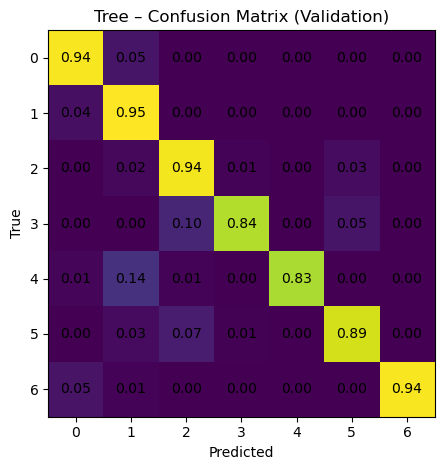

,class,precision,recall,f1-score,support
0,1,0.943243,0.944014,0.943628,31776.0
1,2,0.951715,0.953171,0.952443,42495.0
2,3,0.932578,0.936230,0.934400,5363.0
3,4,0.848411,0.842233,0.845311,412.0
4,5,0.869597,0.833567,0.851201,1424.0


In [30]:
# === BLOCK D — VALIDATION COMPARISON & ARTIFACTS (fixed) ===
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.metrics import (
    f1_score, balanced_accuracy_score, accuracy_score,
    classification_report, confusion_matrix
)
from sklearn.exceptions import NotFittedError

os.makedirs("report/figures", exist_ok=True)

# Apply the same drop to validation features
X_val_locked = X_val.drop(columns=["Inclination"], errors="ignore")

# Best estimators from FAST Block C
best_knn  = best_knn_estimator            # chosen k/p, but not yet fitted
best_tree = gs_tree.best_estimator_       # fitted by GridSearchCV(refit=True)

# Ensure KNN is fitted on FULL TRAIN once before using it
try:
    _ = best_knn.predict(X_val_locked[:5])
except NotFittedError:
    best_knn.fit(X_train_locked, y_train)

def eval_on_val(model, X, y, label):
    yhat = model.predict(X)
    summary = {
        "macro_f1": float(f1_score(y, yhat, average="macro")),
        "balanced_accuracy": float(balanced_accuracy_score(y, yhat)),
        "accuracy": float(accuracy_score(y, yhat)),
    }
    print(f"{label:>6} | macro-F1={summary['macro_f1']:.3f}  "
          f"bal-acc={summary['balanced_accuracy']:.3f}  acc={summary['accuracy']:.3f}")
    print(f"\n=== Validation report: {label} ===")
    print(classification_report(y, yhat, digits=3))
    return yhat, summary

# Evaluate both models on the untouched validation split
yvk, val_knn  = eval_on_val(best_knn,  X_val_locked, y_val, "KNN")
yvt, val_tree = eval_on_val(best_tree, X_val_locked, y_val, "Tree")

# Pick winner by macro-F1 (balanced accuracy as tie-breaker)
WINNER = "Tree" if (
    (val_tree["macro_f1"] > val_knn["macro_f1"]) or
    (val_tree["macro_f1"] == val_knn["macro_f1"] and
     val_tree["balanced_accuracy"] >= val_knn["balanced_accuracy"])
) else "KNN"
print(f"\nWinner on validation: {WINNER}")

# Confusion matrix for the winner (normalized by true class)
y_pred = yvt if WINNER == "Tree" else yvk
cm = confusion_matrix(y_val, y_pred, normalize="true")
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_title(f"{WINNER} – Confusion Matrix (Validation)")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i,j]:.2f}", ha="center", va="center")
fig.tight_layout()
plt.savefig("report/figures/confusion_validation.png", dpi=200, bbox_inches="tight")
plt.show()

# Per-class precision/recall/F1 table for the winner
report = classification_report(y_val, y_pred, output_dict=True)
per_class = (pd.DataFrame(report)
             .T.loc[[k for k in report.keys() if k.isdigit() or k.replace('.','',1).isdigit()]]
             .rename_axis("class").reset_index())
per_class.to_csv("report/per_class_validation.csv", index=False)
display(per_class.head())

# Log validation results
EXP_LOG["validation"] = {"knn": val_knn, "tree": val_tree, "winner": WINNER}


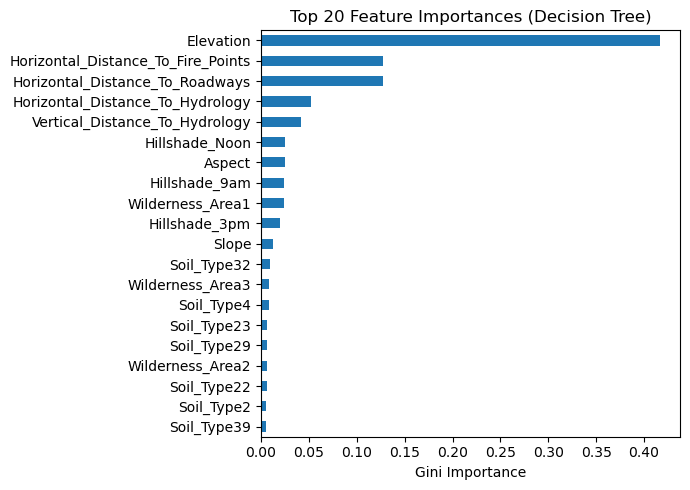

In [31]:
# Refit tree on all TRAIN to compute importances
final_tree = best_tree.fit(X_train_locked, y_train)

def get_feature_names(ct):
    names = []
    for name, trans, cols in ct.transformers_:
        if name == "cat":
            ohe = trans.named_steps["onehot"]
            names.extend(ohe.get_feature_names_out(cols))
        elif name in ("cont","bin"):
            names.extend(cols)
    return names

feat_names = get_feature_names(final_tree.named_steps["pre"])
importances = final_tree.named_steps["clf"].feature_importances_

import pandas as pd, matplotlib.pyplot as plt
top = (pd.Series(importances, index=feat_names)
         .sort_values(ascending=False)
         .head(20))
ax = top[::-1].plot(kind="barh", figsize=(7,5))
ax.set_title("Top 20 Feature Importances (Decision Tree)")
ax.set_xlabel("Gini Importance")
plt.tight_layout()
plt.savefig("report/figures/tree_feature_importance.png", dpi=200, bbox_inches="tight")
plt.show()


In [32]:
import pandas as pd, json, numpy as np

# Pull numbers from the objects you already have:
summary_tbl = pd.DataFrame([
    {"Model": "KNN",
     "macro-F1 (val)": round(val_knn["macro_f1"], 3),
     "Balanced Acc (val)": round(val_knn["balanced_accuracy"], 3),
     "Accuracy (val)": round(val_knn["accuracy"], 3),
     "Key params": f"k={best_knn.get_params()['clf__n_neighbors']}, p={best_knn.get_params()['clf__p']}, weights=distance"},
    {"Model": "Decision Tree",
     "macro-F1 (val)": round(val_tree["macro_f1"], 3),
     "Balanced Acc (val)": round(val_tree["balanced_accuracy"], 3),
     "Accuracy (val)": round(val_tree["accuracy"], 3),
     "Key params": f"criterion={best_tree.get_params()['clf__criterion']}, max_depth={best_tree.get_params()['clf__max_depth']}, "
                   f"min_samples_leaf={best_tree.get_params()['clf__min_samples_leaf']}, ccp_alpha={best_tree.get_params()['clf__ccp_alpha']}"}
])
summary_tbl.to_csv("report/model_summary.csv", index=False)
print(summary_tbl)

# LaTeX table to paste into Overleaf
latex_table = summary_tbl.rename(columns={
    "macro-F1 (val)": "Macro-F1",
    "Balanced Acc (val)": "Balanced Acc",
    "Accuracy (val)": "Accuracy",
    "Key params": "Control parameters"
}).to_latex(index=False, escape=False, float_format="%.3f")
print("\n=== LaTeX table (copy to Overleaf) ===\n")
print(latex_table)


           Model  macro-F1 (val)  Balanced Acc (val)  Accuracy (val)  \
0            KNN           0.894               0.882           0.939   
1  Decision Tree           0.910               0.907           0.944   

                                          Key params  
0                         k=7, p=1, weights=distance  
1  criterion=entropy, max_depth=None, min_samples...  

=== LaTeX table (copy to Overleaf) ===

\begin{tabular}{lrrrl}
\toprule
Model & Macro-F1 & Balanced Acc & Accuracy & Control parameters \\
\midrule
KNN & 0.894 & 0.882 & 0.939 & k=7, p=1, weights=distance \\
Decision Tree & 0.910 & 0.907 & 0.944 & criterion=entropy, max_depth=None, min_samples_leaf=1, ccp_alpha=0.0 \\
\bottomrule
\end{tabular}



In [33]:
EXP_LOG["final"] = {
    "winner": "Tree",
    "knn_confirm_cv5": {"macro_f1_mean": float(np.mean(knn_cvfull['test_f1_macro'])),
                        "bal_acc_mean": float(np.mean(knn_cvfull['test_balanced_accuracy']))},
    "tree_grid_best": gs_tree.best_params_,
    "val_metrics": {"knn": val_knn, "tree": val_tree},
    "drops": ["Observation_ID","Water_Level","Facet","Inclination"],
    "imputation": {"numeric":"median","binary/categorical":"most_frequent"},
    "scaling": {"KNN_continuous":"RobustScaler","Tree":"none","binary":"none"},
    "split": {"type":"train/validation","val_size":0.15,"seed":42}
}
import json
with open("experiment_log.json", "w") as f:
    json.dump(EXP_LOG, f, indent=2)
print("Saved: experiment_log.json and report/model_summary.csv")



Saved: experiment_log.json and report/model_summary.csv
